In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:

from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [7]:
X = iris['data'][:,(2,3)]
y = iris['target']

# Select Setosa or Versicolor 
offset = (y==0) | (y==1)
X = X[offset]
y = y[offset]

In [10]:
data = np.c_[iris['data'],iris['target']]
col = iris['feature_names'] + ['target']
col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [12]:
df = pd.DataFrame(data, columns=col)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


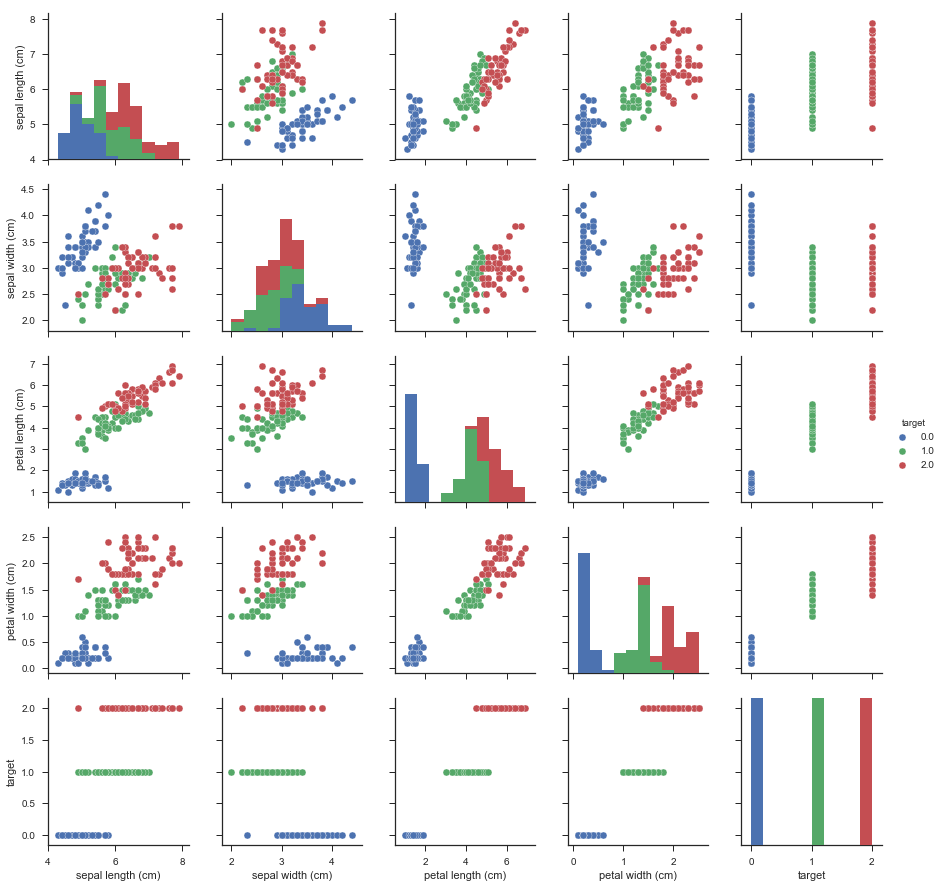

In [19]:
sns.set(style="ticks")
sns.pairplot(df,hue='target')

(0, 2.0)

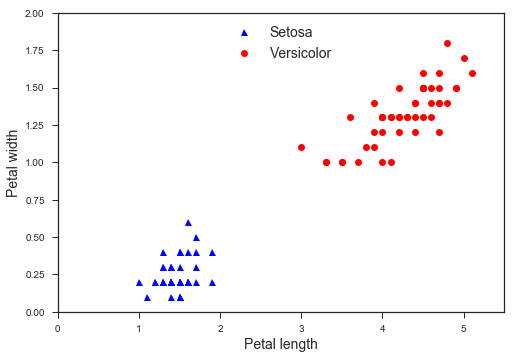

In [20]:
plt.plot(X[:,0][y==0],X[:,1][y==0], 'b^', label='Setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'ro', label='Versicolor')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.xlim(0, 5.5)
plt.ylim(0, 2.0)

In [22]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
RAND = 42

In [23]:
c = 1
alpha = 1 /(c*len(X))

lin_svc = LinearSVC(loss='hinge', C=c, random_state=RAND)
svc = SVC(kernel = 'linear', C=c)
sgd = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, alpha=alpha, n_iter=1000, random_state=RAND)

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
lin_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd.fit(X_scaled, y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='hinge', n_iter=1000, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [27]:
w1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
b1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
b3 = -sgd.intercept_[0]/sgd.coef_[0, 1]

In [31]:
x_span = np.linspace(0,10,200)

line1 = scaler.inverse_transform([[-10, -10*w1+b1],[10, 10*w1+b1]])
line2 = scaler.inverse_transform([[-10, -10*w2+b2],[10, 10*w2+b2]])
line3 = scaler.inverse_transform([[-10, -10*w3+b3],[10, 10*w3+b3]])

(0, 2.0)

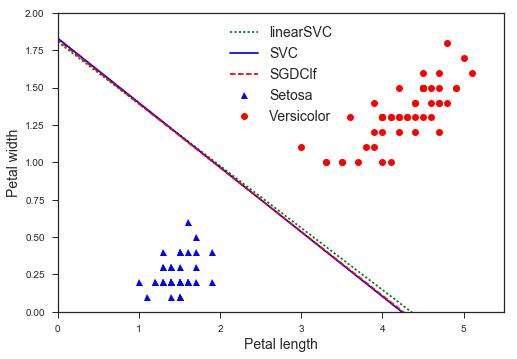

In [33]:
plt.plot(line1[:,0], line1[:,1], 'g:', label='linearSVC')
plt.plot(line2[:,0], line2[:,1], 'b-', label='SVC')
plt.plot(line3[:,0], line3[:,1], 'r--', label='SGDClf')
plt.plot(X[:,0][y==0],X[:,1][y==0], 'b^', label='Setosa')
plt.plot(X[:,0][y==1],X[:,1][y==1], 'ro', label='Versicolor')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.xlim(0, 5.5)
plt.ylim(0, 2.0)

In [36]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

In [39]:

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [41]:
lin_clf.score(X_train, y_train)

0.92678181818181815

In [43]:
svm_clf = SVC(decision_function_shape="ovr")
svm_clf.fit(X_train[:10000], y_train[:10000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svm_clf.score(X_train, y_train)

0.91630909090909096

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1.22789242557, gamma=0.00499155292678 .........................
[CV] .......... C=1.22789242557, gamma=0.00499155292678, total=   0.4s
[CV] C=1.22789242557, gamma=0.00499155292678 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .......... C=1.22789242557, gamma=0.00499155292678, total=   0.4s
[CV] C=1.22789242557, gamma=0.00499155292678 .........................
[CV] .......... C=1.22789242557, gamma=0.00499155292678, total=   0.4s
[CV] C=7.7140586826, gamma=0.0901592134048 ...........................
[CV] ............ C=7.7140586826, gamma=0.0901592134048, total=   0.7s
[CV] C=7.7140586826, gamma=0.0901592134048 ...........................
[CV] ............ C=7.7140586826, gamma=0.0901592134048, total=   0.8s
[CV] C=7.7140586826, gamma=0.0901592134048 ...........................
[CV] ............ C=7.7140586826, gamma=0.0901592134048, total=   0.8s
[CV] C=1.40636914523, gamma=0.0187759809398 ..........................
[CV] ........... C=1.40636914523, gamma=0.0187759809398, total=   0.5s
[CV] C=1.40636914523, gamma=0.0187759809398 ..........................
[CV] ........... C=1.40636914523, gamma=0.0187759809398, total=   0.6s
[CV] C=1.40636914523, gamma=0.0187759809398 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12687bc50>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12687be48>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [47]:
rnd_search_cv.best_score_

0.89900000000000002

In [49]:
rnd_search_cv.best_estimator_.fit(X_train, y_train)

SVC(C=1.4063691452264551, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.018775980939825736,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
rnd_search_cv.best_estimator_.score(X_train, y_train)

0.9962545454545455

In [53]:
rnd_search_cv.best_estimator_.score(X_test, y_test)

0.98340000000000005

In [56]:

df=pd.read_csv('./data/housing.csv')

In [57]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [58]:

from sklearn.datasets import fetch_california_housing

In [59]:
housing = fetch_california_housing()

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/noah_15/scikit_learn_data


In [61]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [62]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [63]:
housing.target[0]

4.5259999999999998

In [66]:
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12aeb9e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129f5e240>]], dtype=object)

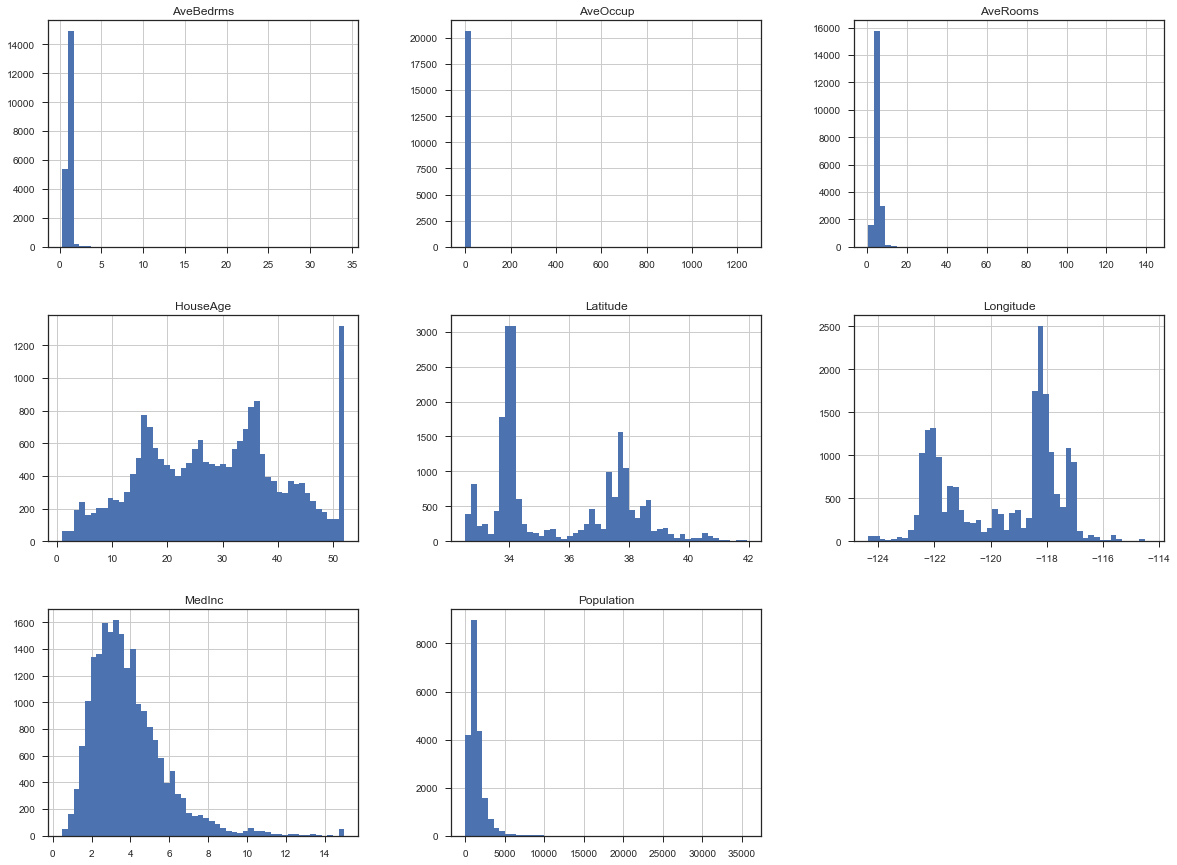

In [65]:
df_housing.hist(bins=50, figsize=(20,15))

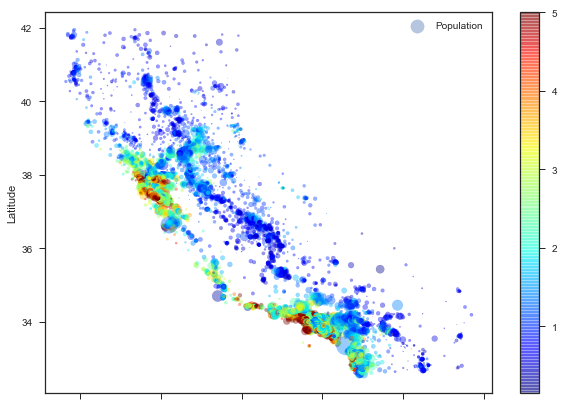

In [67]:

df_housing.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4,
       s=df_housing['Population']/100, label='Population', figsize=(10,7),
       c=housing.target, cmap=plt.get_cmap('jet'), colorbar=True)

In [68]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_housing, housing.target, test_size=0.2, random_state=42)


In [73]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10,30,50,100], 'max_features': [4,5, 6,7, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
  ]
clf = RandomForestRegressor()
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=2 )

In [74]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   0.4s
[CV] max_features=4, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................. max_features=4, n_estimators=10, total=   0.4s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   0.4s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   0.4s
[CV] max_features=4, n_estimators=10 .................................
[CV] .................. max_features=4, n_estimators=10, total=   0.4s
[CV] max_features=4, n_estimators=30 .................................
[CV] .................. max_features=4, n_estimators=30, total=   1.2s
[CV] max_features=4, n_estimators=30 .................................
[CV] .................. max_features=4, n_estimators=30, total=   1.2s
[CV] max_features=4, n_estimators=30 .................................
[CV] .................. max_features=4, n_estimators=30, total=   1.2s
[CV] max_features=4, n_estimators=30 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 50, 100], 'max_features': [4, 5, 6, 7, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [75]:

cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print (np.sqrt(-mean_score), params)

0.527792989129 {'max_features': 4, 'n_estimators': 10}
0.509362877296 {'max_features': 4, 'n_estimators': 30}
0.50721184053 {'max_features': 4, 'n_estimators': 50}
0.500590881399 {'max_features': 4, 'n_estimators': 100}
0.536609104212 {'max_features': 5, 'n_estimators': 10}
0.513085095958 {'max_features': 5, 'n_estimators': 30}
0.50739518544 {'max_features': 5, 'n_estimators': 50}
0.503977718322 {'max_features': 5, 'n_estimators': 100}
0.532871652774 {'max_features': 6, 'n_estimators': 10}
0.514399478877 {'max_features': 6, 'n_estimators': 30}
0.509244642839 {'max_features': 6, 'n_estimators': 50}
0.50750075953 {'max_features': 6, 'n_estimators': 100}
0.533281918611 {'max_features': 7, 'n_estimators': 10}
0.516461658115 {'max_features': 7, 'n_estimators': 30}
0.512326773979 {'max_features': 7, 'n_estimators': 50}
0.509400556223 {'max_features': 7, 'n_estimators': 100}
0.542947252855 {'max_features': 8, 'n_estimators': 10}
0.519726290739 {'max_features': 8, 'n_estimators': 30}
0.5149714

In [76]:
print (np.sqrt(-grid_search.best_score_)/np.mean(y_train))

0.241604103063
